In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

In [ ]:
np.random.seed(0)
X,y = make_blobs(n_samples=5000,centers=[[4,4],[-2,-1],[2,-3],[1,1]],cluster_std=0.9)

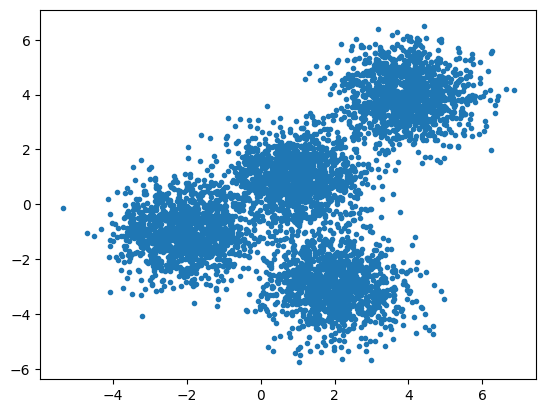

In [ ]:
plt.scatter(X[:,0],X[:,1],marker='.')

In [ ]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')
agglom.fit(X)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [ ]:
agglom.labels_

array([0, 2, 2, ..., 3, 0, 0])

In [ ]:
from sklearn.metrics import silhouette_samples,silhouette_score
ss = silhouette_score(y.reshape(-1,1),agglom.labels_)
print(ss)

0.8511554692234055


In [ ]:
from sklearn import metrics
metrics.homogeneity_score(y,agglom.labels_)

0.8676175224776738

In [ ]:
metrics.completeness_score(y,agglom.labels_)

0.86841193848215

In [ ]:
metrics.v_measure_score(y,agglom.labels_)

0.8680145487154884

In [ ]:
metrics.homogeneity_completeness_v_measure(y,agglom.labels_)

(0.8676175224776738, 0.86841193848215, 0.8680145487154884)

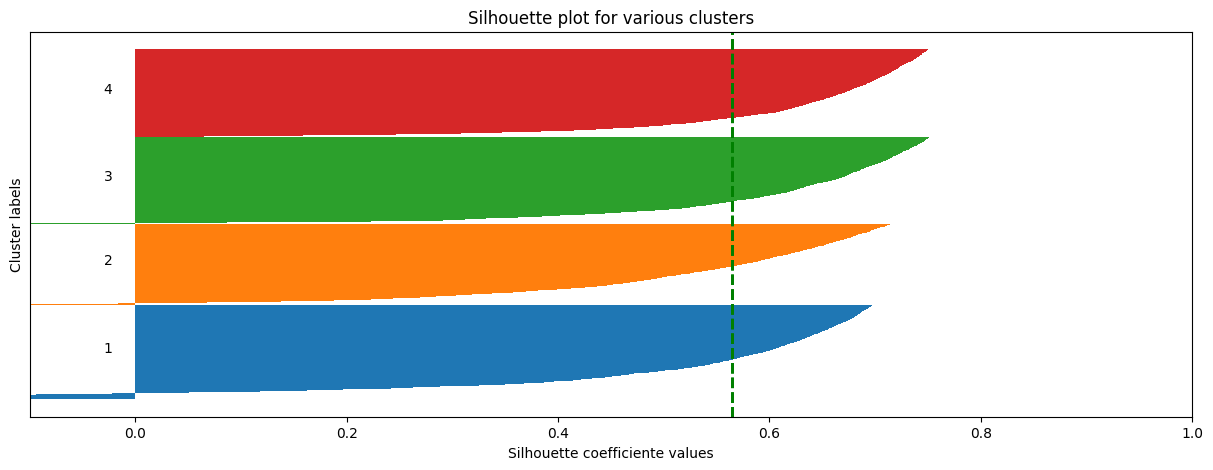

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
y_ticks=[]
y_lower=y_upper=0
silhouette_vals = silhouette_samples(X,agglom.labels_)
for i, cluster in enumerate(np.unique(agglom.labels_)):
  cluster_silhouette_vals = silhouette_vals[agglom.labels_ == cluster]
  cluster_silhouette_vals.sort()
  y_upper += len(cluster_silhouette_vals)

  ax.barh(range(y_lower,y_upper)
  ,  cluster_silhouette_vals,height=1);
  ax.text(-0.03,(y_lower+y_upper)/2,str(i+1))
  y_lower += len(cluster_silhouette_vals)

  avg_score= np.mean(silhouette_vals)
  ax.axvline(avg_score,linestyle = '--',
  linewidth = 2, color='green')
  ax.set_yticks([])
  ax.set_xlim([-0.1,1])
  ax.set_xlabel('Silhouette coefficiente values')
  ax.set_ylabel('Cluster labels')
  ax.set_title('Silhouette plot for various clusters')


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cars_clus.csv")
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


In [ ]:
df[['sales','resale','type','price','engine_s',
    'horsepow','wheelsbas','width','length','curb_wgt','fuel_cap',
    'mpg','lnsales']] = df[['sales','resale','type','price','engine_s','horsepow','wheelbas','width','length',
                            'curb_wgt','fuel_cap','mpg','lnsales']].apply(pd.to_numeric,errors='coerce')
df = df.dropna()


In [ ]:
df = df.reset_index(drop=True)

In [ ]:
print("Shape of dataset after cleaning: ",df.size)
df.head(5)

Shape of dataset after cleaning:  1989


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,wheelsbas
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.200,67.3,172.4,2.639,13.2,28.0,2.828,0.0,101.2
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.100,70.3,192.9,3.517,17.2,25.0,3.673,0.0,108.1
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.600,71.4,196.6,3.850,18.0,22.0,2.150,0.0,114.6
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.600,68.2,178.0,2.998,16.4,27.0,3.015,0.0,102.6
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.700,76.1,192.0,3.561,18.5,22.0,2.933,0.0,108.7


In [ ]:
featureset = df[['engine_s','horsepow','wheelbas','width','length','curb_wgt','fuel_cap','mpg']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
x=featureset.values
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx[0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

In [ ]:
import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
  for j in range(leng):
    D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i],feature_mtx[j])

<ipython-input-28-9d347fa56be6>:3: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  D = scipy.zeros([leng,leng])


In [ ]:
from scipy.cluster import hierarchy
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D,'complete')

<ipython-input-31-05e08d3bcd0c>:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D,'complete')


In [ ]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z,max_d,criterion='distance')
clusters

array([ 1,  5,  5,  6,  5,  4,  6,  5,  5,  5,  5,  5,  4,  4,  5,  1,  6,
        5,  5,  5,  4,  2, 11,  6,  6,  5,  6,  5,  1,  6,  6, 10,  9,  8,
        9,  3,  5,  1,  7,  6,  5,  3,  5,  3,  8,  7,  9,  2,  6,  6,  5,
        4,  2,  1,  6,  5,  2,  7,  5,  5,  5,  4,  4,  3,  2,  6,  6,  5,
        7,  4,  7,  6,  6,  5,  3,  5,  5,  6,  5,  4,  4,  1,  6,  5,  5,
        5,  6,  4,  5,  4,  1,  6,  5,  6,  6,  5,  5,  5,  7,  7,  7,  2,
        2,  1,  2,  6,  5,  1,  1,  1,  7,  8,  1,  1,  6,  1,  1],
      dtype=int32)

In [ ]:
k=5
clusters = fcluster(Z,k,criterion='maxclust')
clusters

array([1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 1, 3, 3, 3, 3, 2, 1,
       5, 3, 3, 3, 3, 3, 1, 3, 3, 4, 4, 4, 4, 2, 3, 1, 3, 3, 3, 2, 3, 2,
       4, 3, 4, 1, 3, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 2, 2, 2, 1, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 1, 3, 3, 3, 3, 3, 2,
       3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1,
       3, 4, 1, 1, 3, 1, 1], dtype=int32)

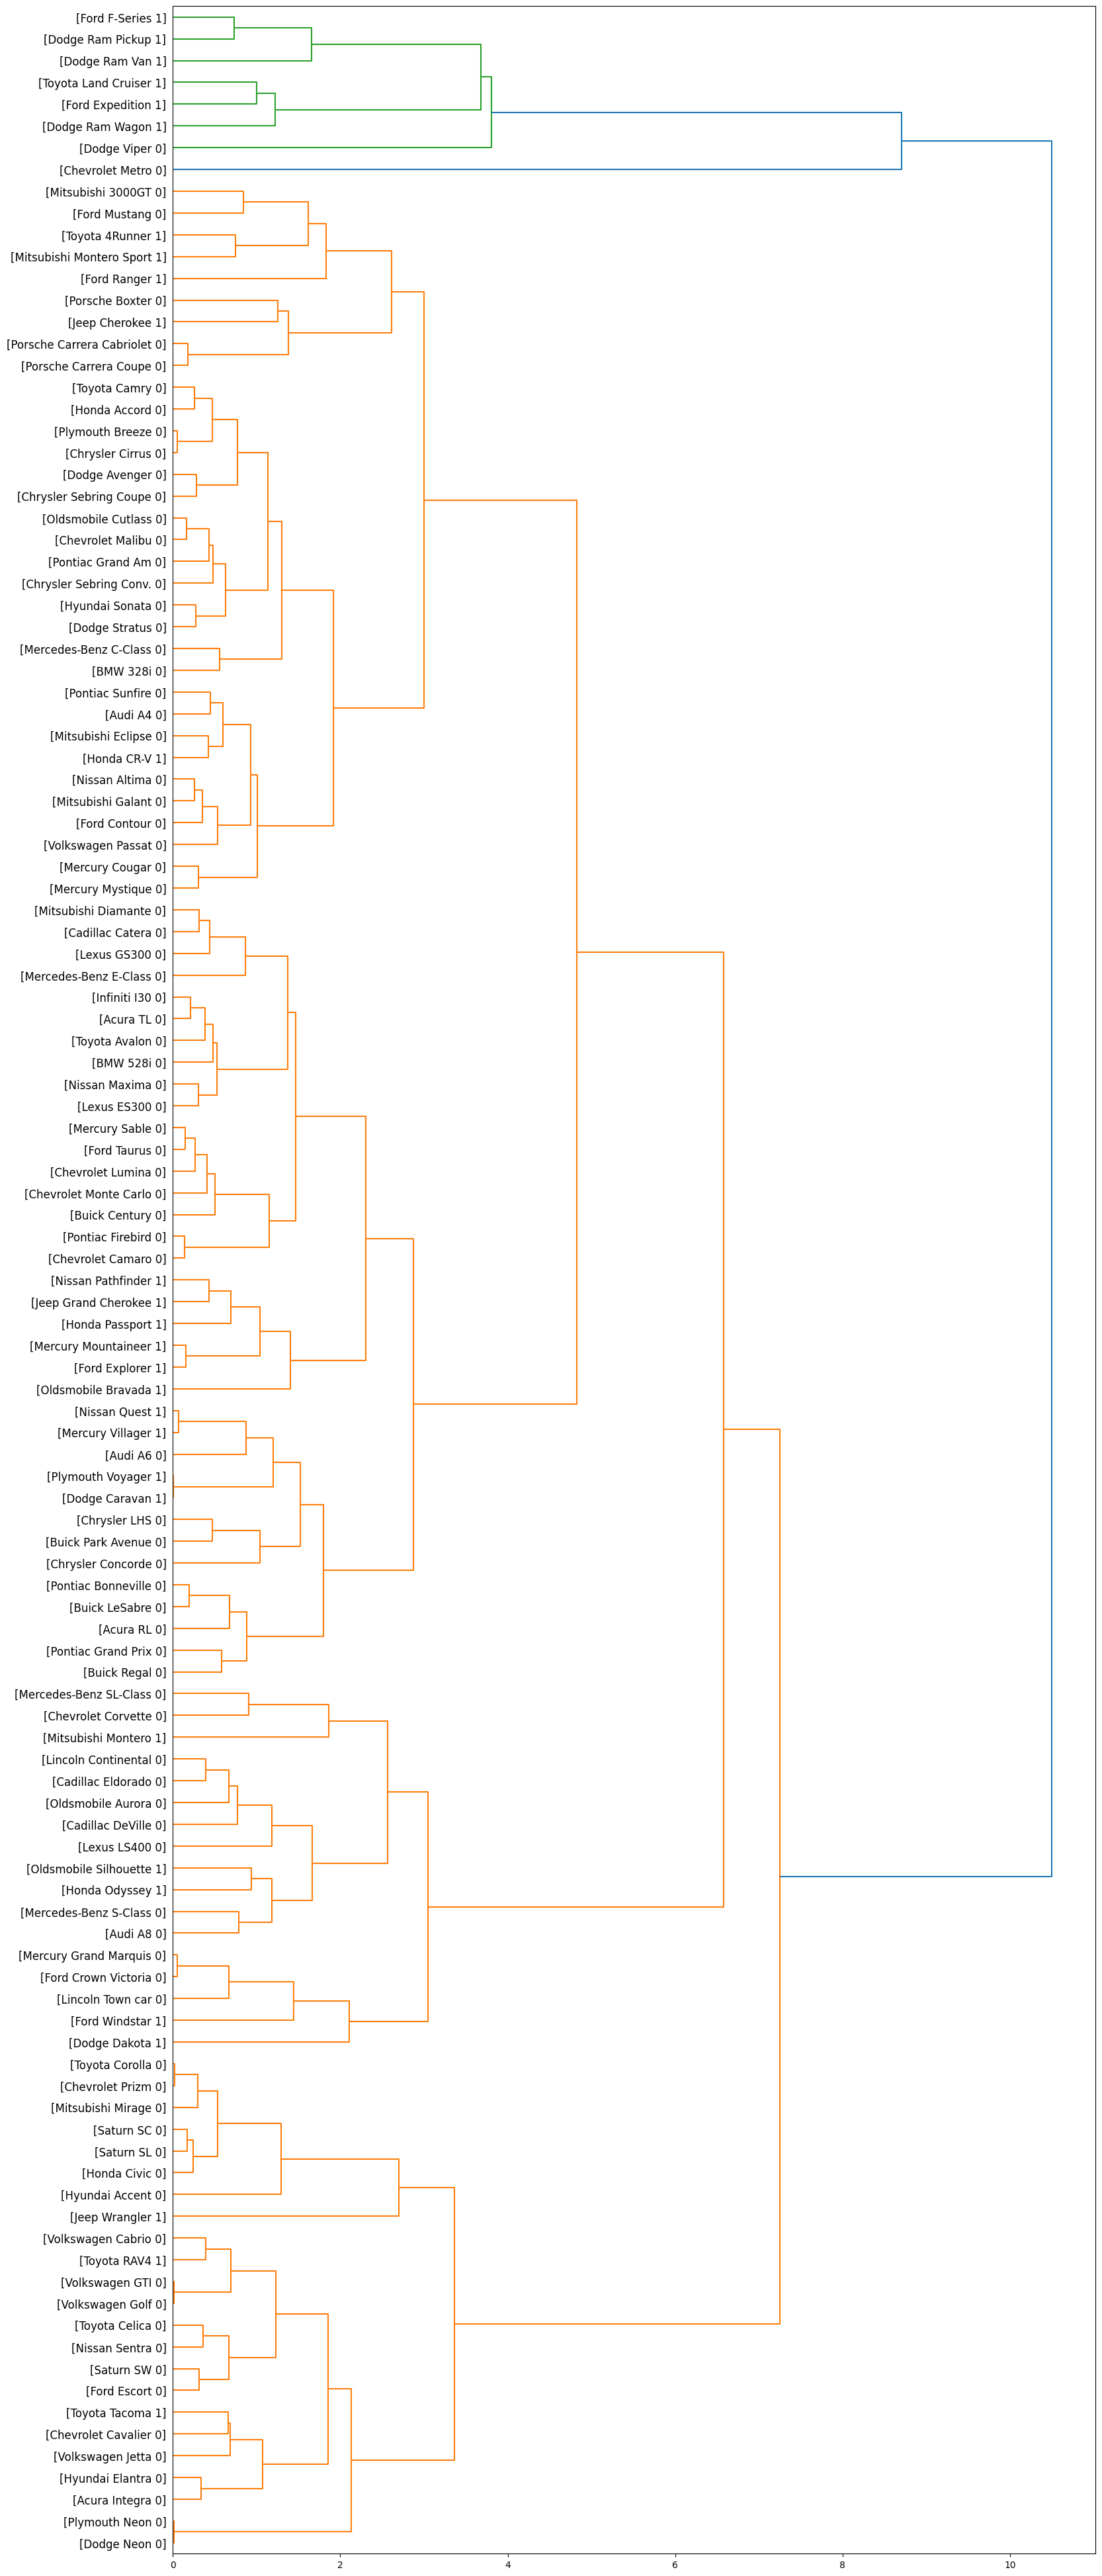

In [ ]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
  return '[%s %s %s]' % (df['manufact'][id],df['model'][id],int(float(df['type'][id])))
dendro = hierarchy.dendrogram(Z,leaf_label_func=llf,leaf_rotation=0,leaf_font_size=12,orientation='right')

In [ ]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage='complete')
agglom.fit(feature_mtx)
agglom.labels_

array([1, 2, 2, 1, 2, 3, 1, 2, 2, 2, 2, 2, 3, 3, 2, 1, 1, 2, 2, 2, 5, 1,
       4, 1, 1, 2, 1, 2, 1, 1, 1, 5, 0, 0, 0, 3, 2, 1, 2, 1, 2, 3, 2, 3,
       0, 3, 0, 1, 1, 1, 2, 3, 1, 1, 1, 2, 1, 1, 2, 2, 2, 3, 3, 3, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 2, 3, 2, 3, 1, 2, 3, 5, 1, 1, 2, 3, 2, 1, 3,
       2, 3, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 0, 1, 1, 1, 1, 1])

In [ ]:
df['cluster_'] = agglom.labels_
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,wheelsbas,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.200,67.3,172.4,2.639,13.2,28.0,2.828,0.0,101.2,1
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.100,70.3,192.9,3.517,17.2,25.0,3.673,0.0,108.1,2
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.600,71.4,196.6,3.850,18.0,22.0,2.150,0.0,114.6,2
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.600,68.2,178.0,2.998,16.4,27.0,3.015,0.0,102.6,1
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.700,76.1,192.0,3.561,18.5,22.0,2.933,0.0,108.7,2


<ipython-input-41-eec7ecbc8c84>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow,subset.mpg,s=subset.price*10,c=color,label='cluster'+str(label),alpha=0.5)


Text(0, 0.5, 'mpg')

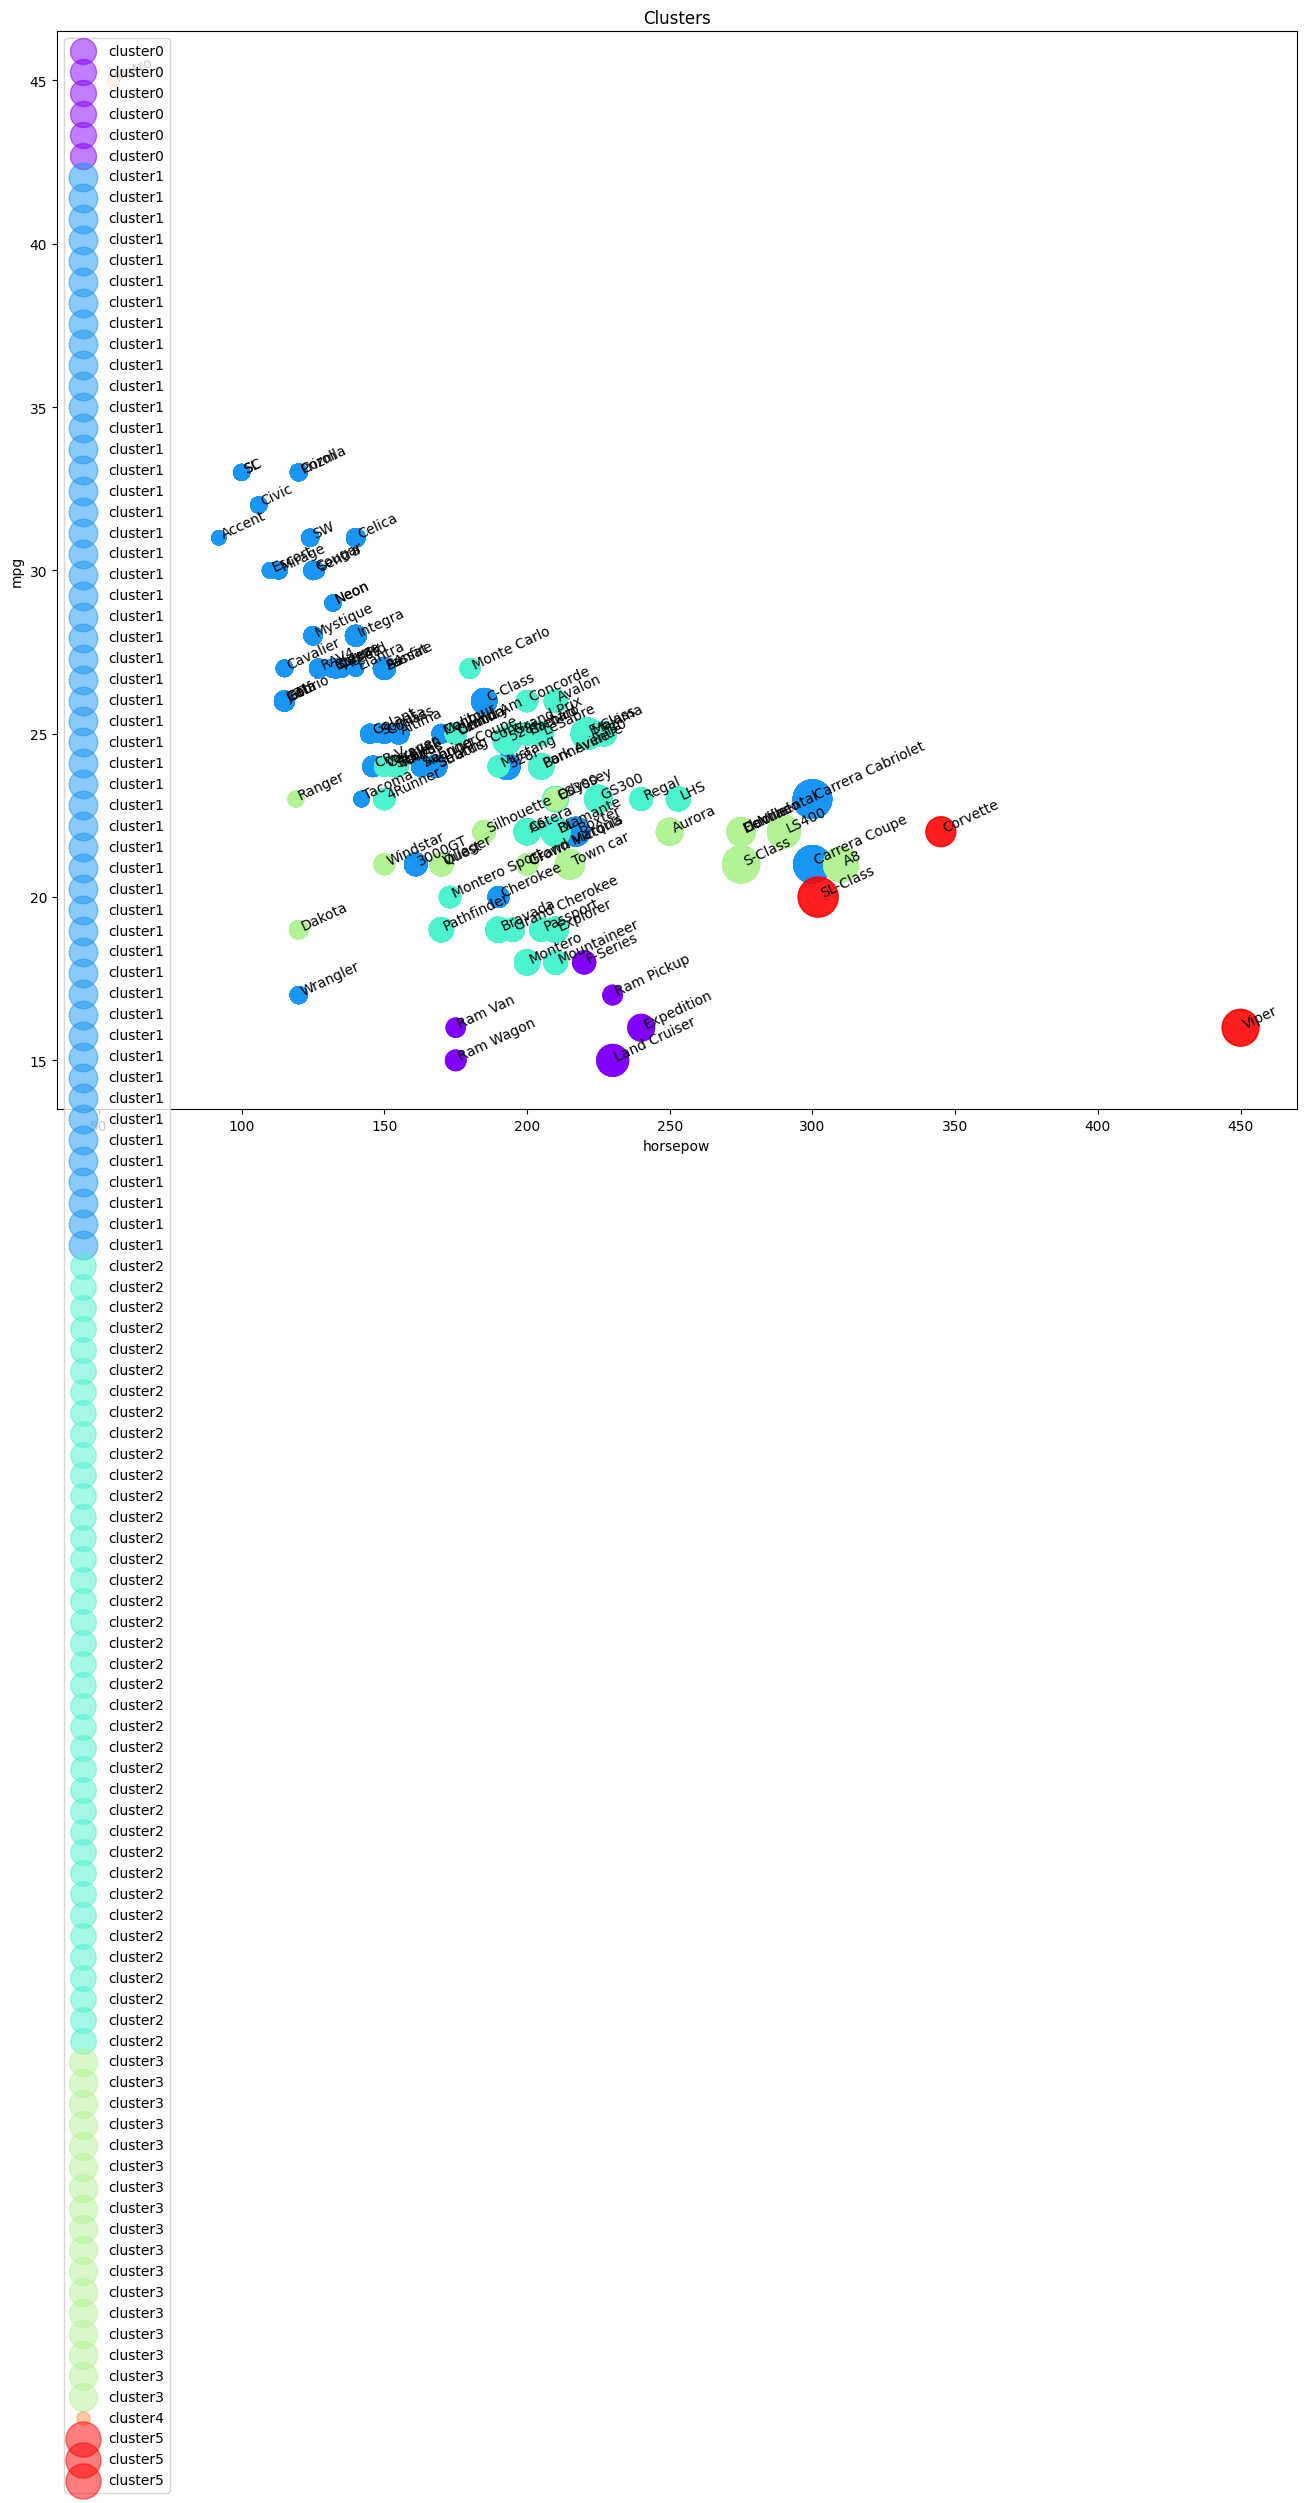

In [ ]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0,1,n_clusters))
cluster_labels = list(range(0,n_clusters))
plt.figure(figsize=(16,14))
for color, label in zip(colors, cluster_labels):
  subset=df[df.cluster_==label]
  for i in subset.index:
    plt.text(subset.horsepow[i],subset.mpg[i],str(subset['model'][i]),rotation=25)
    plt.scatter(subset.horsepow,subset.mpg,s=subset.price*10,c=color,label='cluster'+str(label),alpha=0.5)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

In [ ]:
df.groupby(['cluster_','type'])['cluster_'].count()

cluster_  type
0         1.0      6
1         0.0     47
          1.0      5
2         0.0     27
          1.0     11
3         0.0     10
          1.0      7
4         0.0      1
5         0.0      3
Name: cluster_, dtype: int64

In [ ]:
agg_cars = df.groupby(['cluster_','type'])['horsepow','engine_s','mpg','price'].mean()
agg_cars

<ipython-input-43-a9701cdb999c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_cars = df.groupby(['cluster_','type'])['horsepow','engine_s','mpg','price'].mean()


horsepow  engine_s        mpg      price
cluster_ type                                            
0        1.0   211.666667  4.483333  16.166667  29.024667
1        0.0   146.531915  2.246809  27.021277  20.306128
         1.0   145.000000  2.580000  22.200000  17.009200
2        0.0   203.111111  3.303704  24.214815  27.750593
         1.0   182.090909  3.345455  20.181818  26.265364
3        0.0   256.500000  4.410000  21.500000  42.870400
         1.0   160.571429  3.071429  21.428571  21.527714
4        0.0    55.000000  1.000000  45.000000   9.235000
5        0.0   365.666667  6.233333  19.333333  66.010000

<ipython-input-44-444784c6a592>:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow,subset.mpg,s=subset.price*20,c=color,label='cluster'+str(label))


Text(0, 0.5, 'mpg')

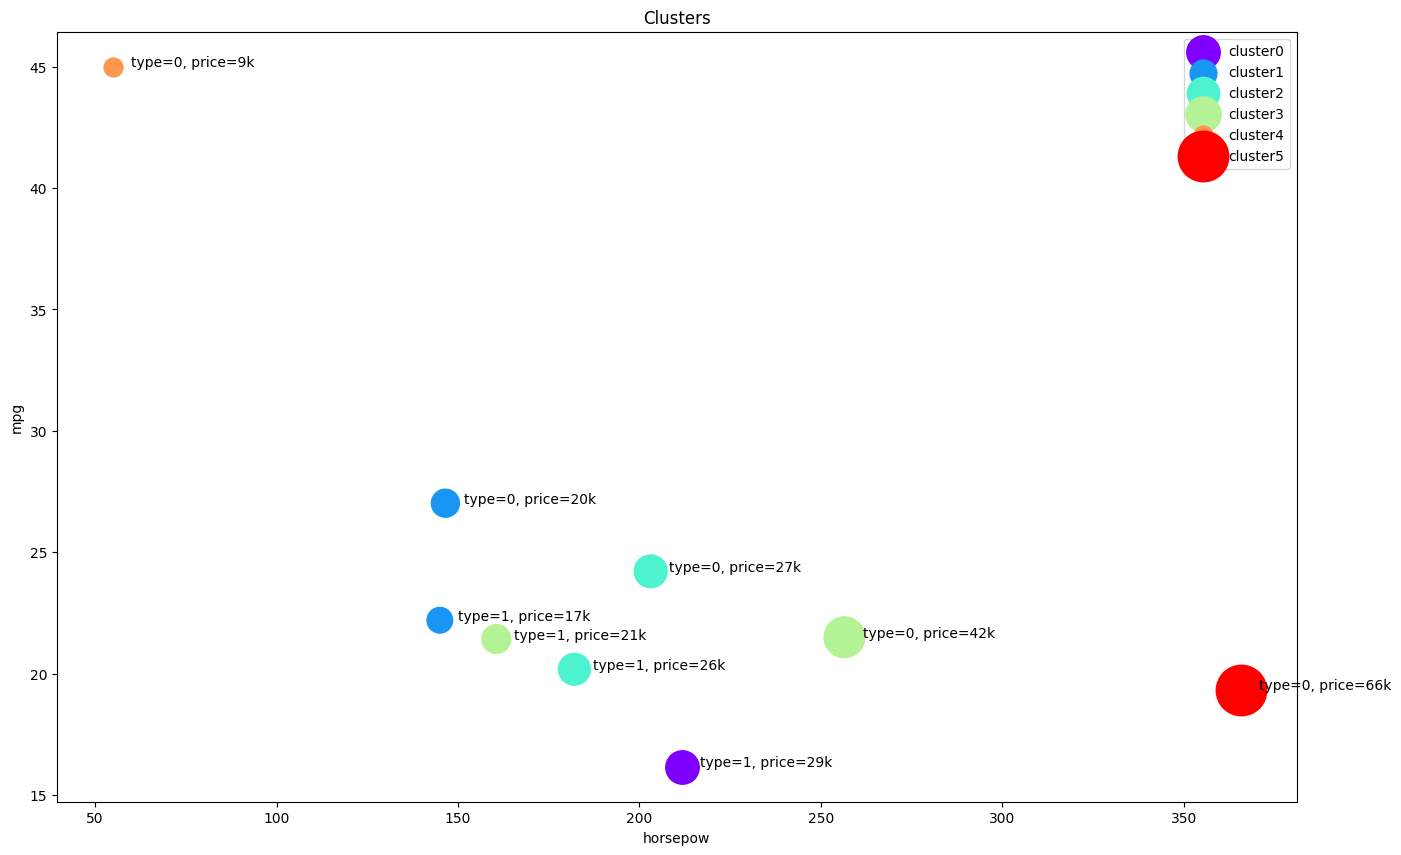

In [ ]:
plt.figure(figsize=(16,10))
for color,label in zip(colors,cluster_labels):
  subset= agg_cars.loc[(label,),]
  for i in subset.index:
    plt.text(subset.loc[i][0]+5,subset.loc[i][2],'type='+str(int(i))+', price='+str(int(subset.loc[i][3]))+'k')
  plt.scatter(subset.horsepow,subset.mpg,s=subset.price*20,c=color,label='cluster'+str(label))

plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')